<a href="https://colab.research.google.com/github/Adevita1/Adevita1/blob/main/Lab_API_MODULO2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ACTIVIDAD INTEGRADORA


# MÓDULO 2: Aprendizaje automático de máquinas (machine learning)


## Entrenar el primer modelo - Notebook

## Set de datos de pacientes enfermos con diabetes

Se obtuvieron diez variables basales, edad, sexo, índice de masa corporal, presión arterial promedio y seis mediciones del suero sanguíneo para cada uno de n = 442 pacientes con diabetes, así como la respuesta de interés, una medida cuantitativa de la progresión de la enfermedad un año después del inicio .

* age: edad en años
* sex
* bmi: índice de masa corporal
* bp: promedio de presión sanguínea
* s1: T-Cells (un tipo de células blancas de la sangre)
* s2: low-density lipoproteins
* s3: high-density lipoproteins
* s4: hormona de estimulación tiroidal
* s5: lamotrigina
* s6: nivel de azúcar en la sangre



### Cargamos un dataset disponible en sklearn

In [1]:
import pandas as pd

In [2]:
# Cargamos el dataset que se encuentra en la librería sklearn
from sklearn.datasets import load_diabetes
datos = load_diabetes()

In [3]:
# Estos dataset precargados vienen con un formato diferente (no son dataframe)
# entonces, guardamos el conjunto de variables explicativas como un dataframe
# y también guardamos la variable de interés (el target)
X = pd.DataFrame(datos.data, columns=datos.feature_names)
Y = datos.target

### Exploramos el dataset de pacientes con diabetes cargado

In [4]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [5]:
X.head(10)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504


### Creamos y ajustamos un primer modelo

### Aplicamos REGRESION LINEAL II - regresión múltiple
$$y = f(\mathbf{x}) = \beta_0 + x_1\beta_1 + ... + x_k\beta_k$$

In [6]:
import numpy as np
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X, Y)

Y_hat = model.predict(X)

### Evaluamos el desempeño del modelo en base a diferentes métricas!

In [7]:
# Evaluamos el error cuadrático medio
from sklearn.metrics import mean_squared_error
mean_squared_error(Y, Y_hat)

2859.69634758675

In [8]:
# Evaluamos el error absoluto medio
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y, Y_hat)

43.27745202531506

In [9]:
# Evaluamos el coficiente de determinación
from sklearn.metrics import r2_score
r2_score(Y, Y_hat)

0.5177484222203499

###  Preguntas

¿Qué significa la métrica "r2_score"? Investiga

# El r2_score o coeficiente de determinación mide qué proporción de la varianza en la variable objetivo (Y) puede ser explicada por las variables del modelo. Su valor va de 0 a 1 (aunque puede ser negativo si el modelo es muy malo). Un valor cercano a 1 indica que el modelo explica bien los datos.

¿Qué indica cada una de las métricas anteriores?

# Mean Squared Error (MSE): Mide el promedio de los errores al cuadrado. Penaliza más los errores grandes. Cuanto menor sea, mejor.

# Mean Absolute Error (MAE): Mide el promedio de los errores absolutos. Es más robusto frente a valores atípicos. También, cuanto menor, mejor.

# R2 Score: Indica la proporción de la variación total de la variable objetivo que es explicada por el modelo. Cuanto más cerca de 1, mejor el ajuste.



### Graficamos el target esperado contra los resultados que entrega el modelo

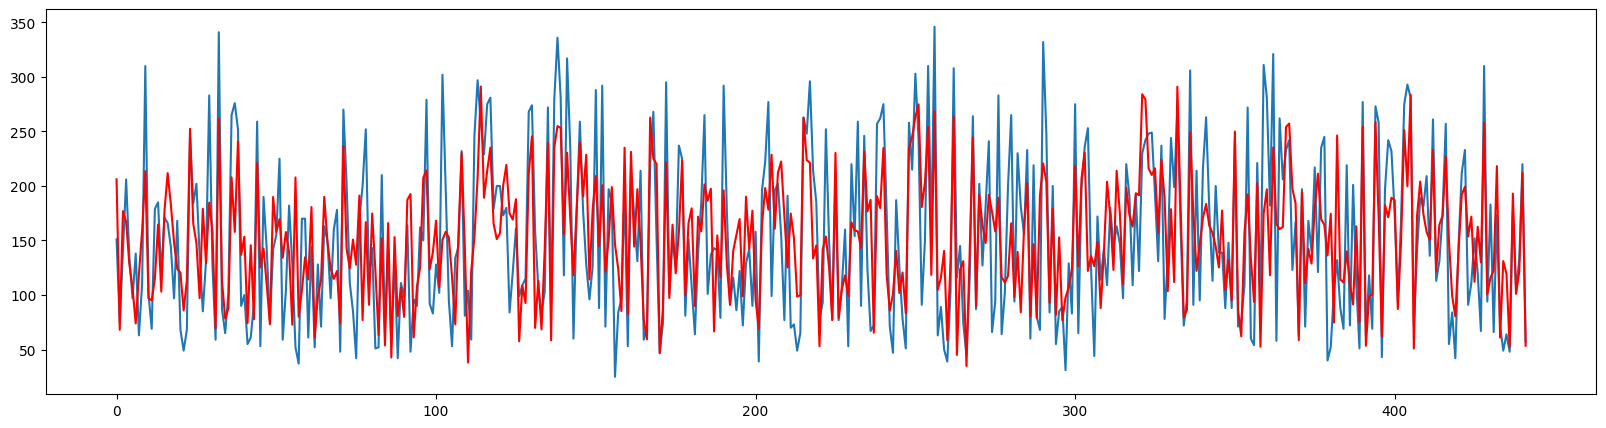

In [10]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(20,5))
plt.plot(Y)
plt.plot(Y_hat, 'r')

### ANÁLISIS

Se pude ver en al gráfico que la predicción como el valor real estan muy cercanos, lo que podría indicarlos que hay un sobreajuste o overfitting

### Implementando la mejora dividiendo los ser de entrenamiento y prueba

In [11]:
# En este caso dividimos el set en un 33% de pruebas y un 67% de entrenamiento
import numpy as np
from sklearn.model_selection import train_test_split

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X,Y,test_size=0.33)

In [12]:
print(Xtrain.shape)
print(Xtest.shape)

(296, 10)
(146, 10)


### Entrenamos con regresión lineal el set de entrenamiento y predecimiento con el ser de pruebas

3299.757730380676
46.53466252492323
0.4145570693137247


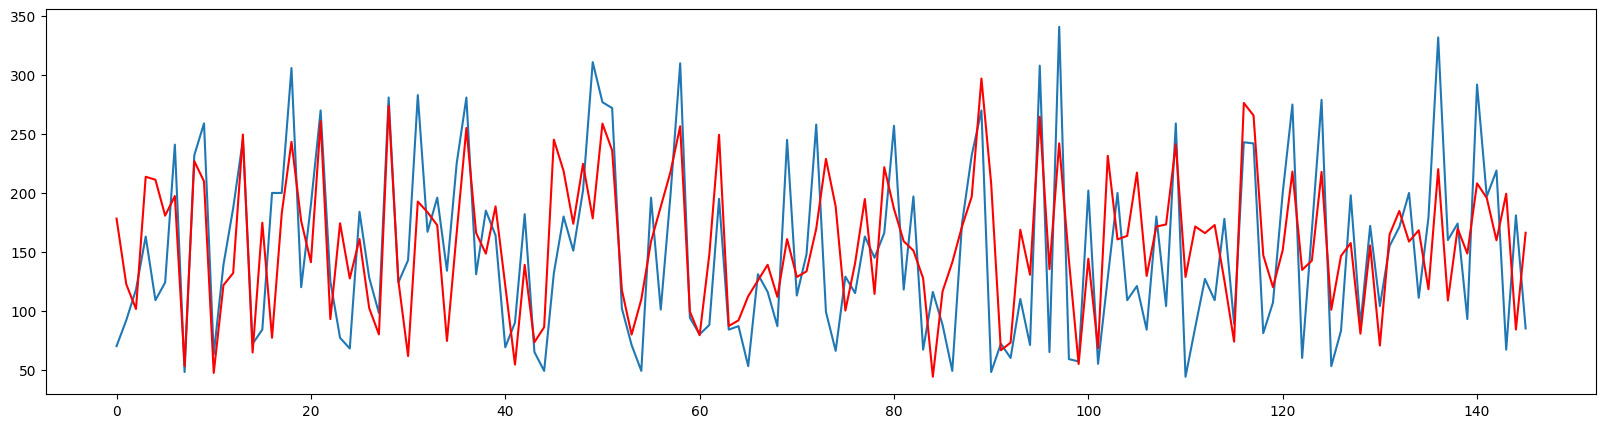

In [13]:
model = LinearRegression()

model.fit(Xtrain, Ytrain)

Y_hat = model.predict(Xtest)

print(mean_squared_error(Ytest, Y_hat))
print(mean_absolute_error(Ytest, Y_hat))
print(r2_score(Ytest, Y_hat))

plt.subplots(figsize=(20,5))
plt.plot(Ytest)
plt.plot(Y_hat, 'r')

### Volvemos a barajar los datos y entrenar

In [14]:
X1train, X1test, Y1train, Y1test = train_test_split(X,Y, shuffle=True, test_size=0.33)

2999.5046191311126
45.12656116170065
0.4458972682274508


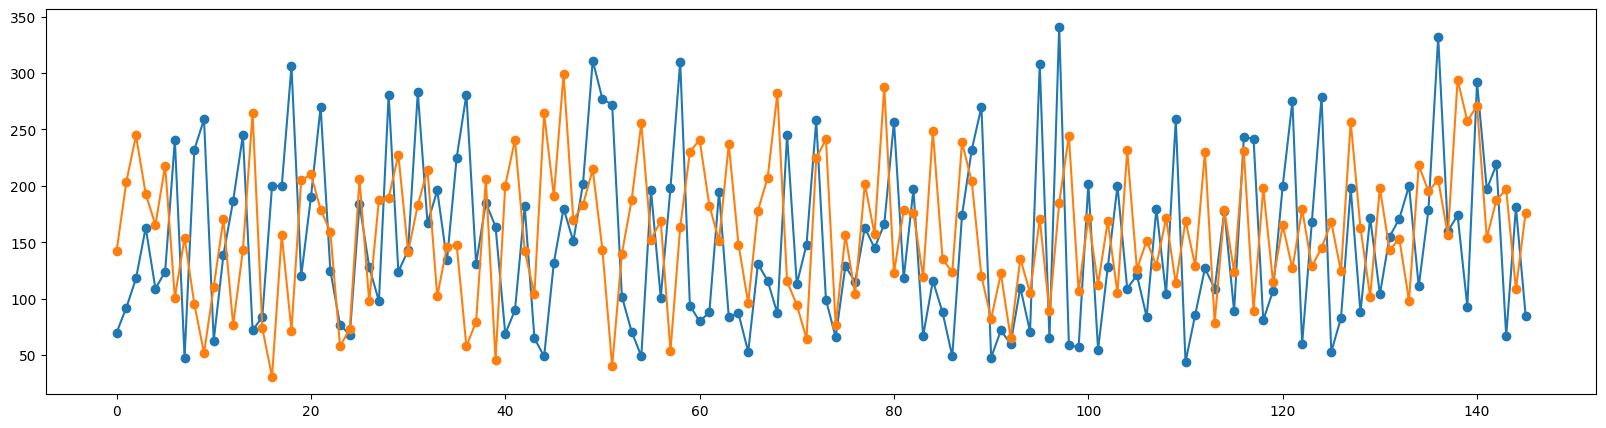

In [15]:
model = LinearRegression()

model.fit(X1train, Y1train)

Y_hat = model.predict(X1test)

print(mean_squared_error(Y1test, Y_hat))
print(mean_absolute_error(Y1test, Y_hat))
print(r2_score(Y1test, Y_hat))

plt.subplots(figsize=(20,5))
plt.plot(Ytest, marker="o")
plt.plot(Y_hat, marker="o")

In [16]:
# revisamos cantidad de filas y columnas del set de datos original
np.shape(datos.data)

(442, 10)

### Aplicamos la estratificación en la división de los set de datos de entrenamiento y prueba de manera que en cada salto (kfold) tome distintos datos en la división definida. Se evaluará con el promedio de errores y R2 score

In [17]:
# Comenzamos con 6 saltos
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=6)
X1 = datos.data
Y1 = datos.target

errores = []
scoredummy1 = []

# en este caso hay que entregarle tanto X como y a kf.split, ya que hará un split estratificado
for train_index, test_index in kf.split(X1, Y1):
    X_train = X1[train_index]
    X_test = X1[test_index]

    y_train = Y1[train_index]
    y_test = Y1[test_index]

    clf = LinearRegression()
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    errorM = mean_squared_error( y_test, y_pred)
    errores.append(errorM)
    scoreD1 = r2_score( y_test, y_pred)
   # print(scoreD)
    scoredummy1.append(scoreD1)

print(sum(errores) / len(errores))
print(sum(scoredummy1) / len(scoredummy1))

3005.31642989855
0.4856087978602801


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


In [18]:
# Mostramos todos los scores obtenidos con validación cruzada en 6 saltos, el objetivo es saber cual es el mejor
from sklearn.model_selection import cross_val_score
cross_val_score(clf, X1, Y1, cv=kf, n_jobs=-1)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=6.
  warnings.warn(


array([0.50117689, 0.45486416, 0.46936287, 0.55989634, 0.50545988,
       0.42289264])

### Pregunta

¿Podemos trabajar con mas o menos saltos?, pruebe e indique los resultados.

### Generamos un regresor dummy que tiene como objetivo obtener una línea base de resultados para comparar. En este caso utilizaremos la estrategia de siempre predicir la media del conjunto de entrenamiento (strategy="mean")

Pueden revisar mas detalles en: https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyRegressor.html

In [19]:
# Seguimos con 3 saltos
from sklearn.dummy import DummyRegressor

kf = StratifiedKFold(n_splits=3)

X1 = datos.data
Y1 = datos.target

erroresD = []
scoredummy = []

# en este caso hay que entregarle tanto X como y a kf.split, ya que hará un split estratificado
for train_index, test_index in kf.split(X1, Y1):
    X_train = X1[train_index]
    X_test = X1[test_index]

    y_train = Y1[train_index]
    y_test = Y1[test_index]

    clf = DummyRegressor(strategy="mean")
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    errorMD = mean_squared_error( y_test, y_pred)
    erroresD.append(errorMD)
    scoreD = r2_score( y_test, y_pred)
    scoredummy.append(scoreD)


print(sum(erroresD) / len(erroresD))
print(sum(scoredummy) / len(scoredummy))

5929.327628209937
-4.9328648519993594e-06


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


## Pregunta

¿Cuál es el mejor modelo, en que salto podemos encontrarlo y con cuantos saltos se ejecutó el entrenamiento?

### Se muestra un ejemplo de regresión polinomial que  intenta mostrar el entrenamientos de polinomios de distintos grados

basado en http://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html,

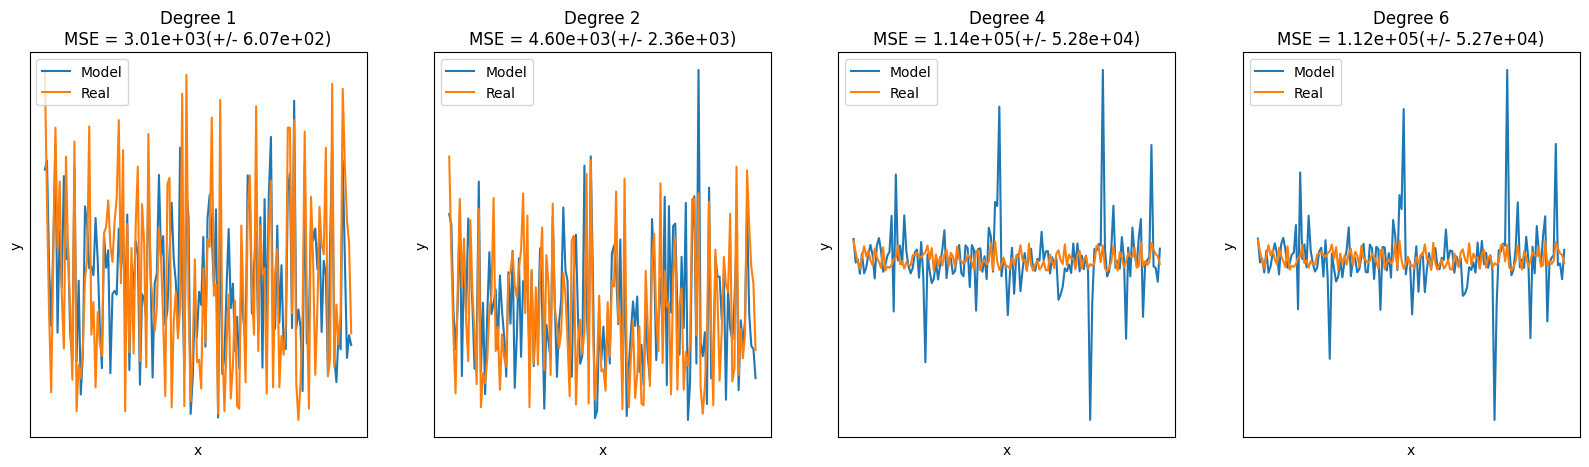

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

np.random.seed(0)

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

n_samples = 30
degrees = [1, 2, 4, 6]

X2, X2_test, y2, y2_test = train_test_split(datos.data, datos.target, shuffle=True, test_size=0.33)

plt.figure(figsize=(20, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = make_pipeline(PolynomialFeatures(degree=degrees[i], include_bias=True), LinearRegression())

    polynomial_features.fit(X2, y2)

    # Evaluar el modelo utilizando crossvalidation
    scores = cross_val_score(polynomial_features, X2, y2,
                             scoring="neg_mean_squared_error", cv=10)

    X_test3 = polynomial_features.predict(X2_test)
    plt.plot(X_test3, label="Model")
    plt.plot(y2_test, label="Real")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### 🧾 Conclusiones Finales

En esta actividad entrenamos un modelo de regresión lineal múltiple utilizando un dataset real de pacientes con diabetes. El objetivo fue predecir la progresión de la enfermedad a partir de variables clínicas y bioquímicas.

El modelo fue evaluado utilizando métricas como el error cuadrático medio (MSE), el error absoluto medio (MAE) y el coeficiente de determinación (R²), lo que nos permitió conocer su desempeño.

Si bien el modelo muestra un ajuste razonable, sería recomendable en el futuro aplicar validación cruzada, probar modelos más complejos como árboles de decisión o regresión regularizada (Ridge, Lasso), y realizar un análisis más profundo de correlaciones y distribución de variables.

Esta práctica permitió afianzar los conocimientos sobre el flujo básico de entrenamiento y evaluación de modelos en Python con Scikit-learn.

###### ***Curso: Machine Learning en la nube***
###### ***Autor: Marcelo Miranda Williams***